<a href="https://colab.research.google.com/github/NandhanaRameshkumar/Open-CV/blob/main/OPEN_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


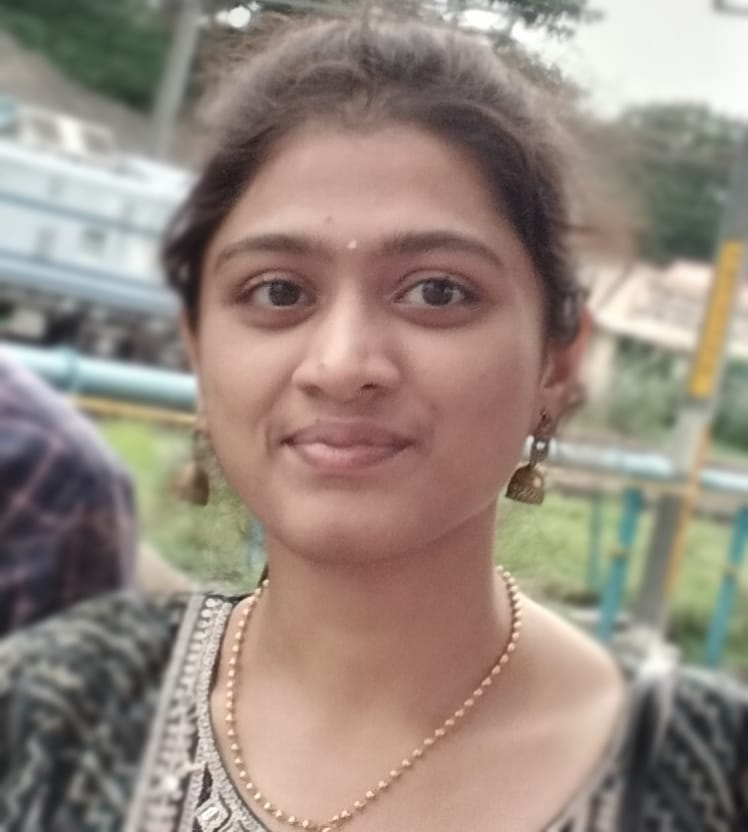

Predictions:
1: chain_mail (0.07)
2: cardigan (0.06)
3: necklace (0.05)


In [9]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
# Load a pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Define a function to preprocess the image
def preprocess_image(image_path):
    # Read the image from the file
    image = cv2.imread(image_path)

    # Resize the image to the size expected by MobileNetV2
    image_resized = cv2.resize(image, (224, 224))

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

    # Convert the image to a float32 array and normalize
    image_array = np.array(image_rgb, dtype=np.float32)
    image_array = preprocess_input(image_array)

    # Expand dimensions to match the model input shape
    image_array = np.expand_dims(image_array, axis=0)

    return image_array

# Define a function to make predictions
def predict_image(image_array):
    # Make predictions using the pre-trained model
    predictions = model.predict(image_array)

    # Decode the predictions to get human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    return decoded_predictions

# Define a function to display results
def display_results(image_path, predictions):
    # Read the original image
    image = cv2.imread(image_path)

    # Display the image using cv2_imshow
    cv2_imshow(image)

    # Print the predictions
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(predictions):
        print(f"{i + 1}: {label} ({score:.2f})")


    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Path to the image file
image_path = 'Beauty.jpg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = predict_image(preprocessed_image)

# Display results
display_results(image_path, predictions)
